# Labo 3 - Spreidingsmaten

Gegeven is het bestand 'movies.csv' die de IMDB 5000 dataset bevat. Deze dataset bevat gegevens (afkomstig van imdb.com) over meer dan 5000 films.
Gebruik Python met bijhorende libraries om de onderstaande vragen uit te werken en te beantwoorden.

Voor het aanduiden van het genre van een film is een **one-hot representatie** gebruikt. Dat wil zeggen dat er voor elk mogelijk genre een aparte kolom gebruikt is. Behoort een film tot een bepaald genre, dat wordt dat via de waarde 1 aangeduid, indien de film niet tot het genre behoort wordt dit aangeduid met de waarde 0.

Een beschrijving van de verschillende variabelen kan je hieronder vinden:

| Variable Name |Description |
| --- | --- | 
|movie_title 	|Title of the Movie |
| duration |	Duration in minutes |
|director_name |	Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name 	|Other actor starring in the movie|
|actor_2_facebook_likes |	Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users 	|Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color 	|Film colorization. ‘Black and White’ or ‘Color’|
|title_year 	| The year in which the movie is released (1916:2016)
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
# Importeren van de dataset
dataset = pd.read_csv('movies.csv',sep=',')

In [3]:
# Toon de eerste 10 rijen
dataset.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Hoeveel films steken in de dataset?

In [4]:
aantal_films = dataset.shape[0]
print('Aantal films in de dataset: ', aantal_films)

Aantal films in de dataset:  5043


Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekenede waarden? 

In [5]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505,0.228634,0.183026,0.047987,0.058100,0.371208,0.176284,0.023994,0.514376,0.108269,0.120960,0.001190,0.000198,0.041047,0.112036,0.042435,0.026175,0.099147,0.000595,0.000397,0.219512,0.122150,0.000991,0.036090,0.279794,0.042237,0.019235
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110,0.419994,0.386726,0.213761,0.233956,0.483176,0.381099,0.153044,0.499843,0.310751,0.326113,0.034476,0.014082,0.198419,0.315443,0.201600,0.159671,0.298889,0.024385,0.019913,0.413957,0.327491,0.031475,0.186532,0.448942,0.201149,0.137362
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Wat is de hoogste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [7]:
hoogste_score = dataset['imdb_score'].max()
print('Hoogste score: ', hoogste_score)
beste_film = dataset[dataset['imdb_score']==hoogste_score].movie_title.values[0]
print('Hoogst gescoorde film: ', beste_film)

Hoogste score:  9.5
Hoogst gescoorde film:  Towering Inferno             


Wat is de laagste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [9]:
laagste_score = dataset['imdb_score'].min()
print('Laagste score: ', laagste_score)
slechtste_film = dataset[dataset['imdb_score']==laagste_score].movie_title.values[0]
print('Laagst gescoorde film: ', slechtste_film)

Laagste score:  1.6
Laagst gescoorde film:  Justin Bieber: Never Say Never 


Welke is de langste film en welke is de kortste film?

In [10]:
duurtijd_kortst = dataset['duration'].min()
duurtijd_langst = dataset['duration'].max()

kortste_film = dataset[dataset['duration']==duurtijd_kortst].movie_title.values[0]
langste_film = dataset[dataset['duration']==duurtijd_langst].movie_title.values[0]

print('De kortste film is', kortste_film, 'met een duurtijd van ', duurtijd_kortst, 'minuten')
print('De langste film is', langste_film, 'met een duurtijd van ', duurtijd_langst, 'minuten')

De kortste film is Shaun the Sheep              met een duurtijd van  7.0 minuten
De langste film is Trapped              met een duurtijd van  511.0 minuten


Sorteer van hoge omzet naar lage omzet (gross variabele). Gebruik hiervoor de sort_values functie.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html


In [11]:
# Top 10 films met de grootste omzet
dataset.sort_values('gross',ascending=False).movie_title[:10]


0                                          Avatar 
26                                        Titanic 
29                                 Jurassic World 
794                                  The Avengers 
17                                   The Avengers 
66                                The Dark Knight 
240     Star Wars: Episode I - The Phantom Menace 
3024           Star Wars: Episode IV - A New Hope 
8                         Avengers: Age of Ultron 
3                           The Dark Knight Rises 
Name: movie_title, dtype: object

Maak een histogram van het aantal films volgens de imdb score.

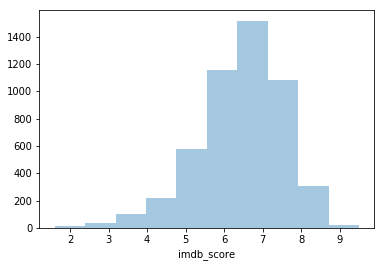

In [12]:
sns.distplot(dataset.imdb_score, bins =10,kde = False)

Bereken nu de centrummaten en spreidingsmaten van de imdb score. Bepaal met andere woorden: 
- Het gemiddelde - mean()
- De mediaan - median()
- Variantie - var()
- Standaardafwijking - std()
- De range - max() - min()
- Q1 en Q3 en bereken hieruit de interkwartielafstand: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
- De scheefheid - skew()
- De kurtosis - kurt()

Reflecteren deze centrummaten en spreidingsmaten wat je afleest op het histogram? Kijk dan vooral naar het gemiddelde, standaardafwijking en scheefheid

In [13]:
print('Gemiddelde:', dataset.imdb_score.mean())
print('Mediaan:', dataset.imdb_score.median())
print('Variantie:', dataset.imdb_score.var())
print('Standaardafwijking:', dataset.imdb_score.std())
print('Range:',dataset.imdb_score.max()-dataset.imdb_score.min())
print('Q1:',dataset.imdb_score.quantile(0.25))
print('Q3:',dataset.imdb_score.quantile(0.75))
print('Interkwartielafstand:',dataset.imdb_score.quantile(0.75)-dataset.imdb_score.quantile(0.25))
print('Scheefheid', dataset.imdb_score.skew())
print('Kurtosis', dataset.imdb_score.kurt())

Gemiddelde: 6.442137616498116
Mediaan: 6.6
Variantie: 1.2658857113237107
Standaardafwijking: 1.125115865732819
Range: 7.9
Q1: 5.8
Q3: 7.2
Interkwartielafstand: 1.4000000000000004
Scheefheid -0.7414713363265145
Kurtosis 0.9356915064109081


Maak een boxplot van de imdb score

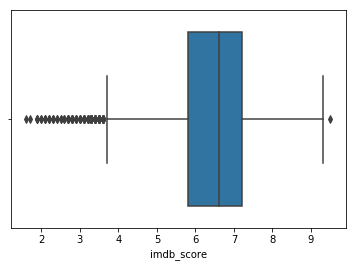

In [14]:
sns.boxplot(dataset.imdb_score,whis = 1.5)

De hoeveelheid winst (of verlies) van een film is niet in de dataset te vinden maar valt eenvoudig te berekenen door van de opbrengst de kosten af te trekken. Met andere woorden: $gross-budget$. Deze berekende winst voegen we toe aan onze dataset als volgt: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [15]:
# Nieuwe kolom 'profit' wordt op het einde toegevoegd
dataset.insert(dataset.columns.size,'profit',dataset.gross - dataset.budget)
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,198130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


Welke is de meest verlieslatende film en welke de meest winstgevende?

In [16]:
minste_winst = dataset['profit'].min()
verlies_film = dataset[dataset['profit']==minste_winst].movie_title.values[0]
print('Meest verlieslatende film:', verlies_film, 'met een verlies van ',minste_winst,'dollar')

meeste_winst = dataset['profit'].max()
print('Meeste winst: ', meeste_winst)
winst_film = dataset[dataset['profit']==meeste_winst].movie_title.values[0]
print('Meest winstgevende film:', winst_film, 'met een winst van ',meeste_winst,'dollar')

Meest verlieslatende film: The Host  met een verlies van  -12213298588.0 dollar
Meeste winst:  523505847.0
Meest winstgevende film: Avatar  met een winst van  523505847.0 dollar


Iemand beweert dat Sci-Fi films winstgevender zijn dan Fantasy films. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven

[(-100000000.0, 100000000.0)]

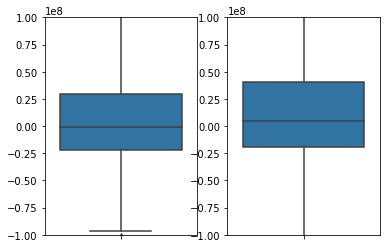

In [23]:
profit_sci_fi = dataset[dataset['Sci-Fi']==1].profit.values
profit_Fantasy = dataset[dataset['Fantasy']==1].profit.values


# Maken van subplots
f, axes = plt.subplots(1, 2)

sns.boxplot(profit_sci_fi,whis = 1.5, orient='v',ax=axes[0])
axes[0].set(ylim=(-1e8, 1e8))
sns.boxplot(profit_Fantasy,whis = 1.5, orient='v',ax=axes[1])
axes[1].set(ylim=(-1e8, 1e8))



Dezelfde persoon beweert ook dat Sci-Fi films beter scoren dan horror films. Klopt deze bewering. Gebruik de centrummaten en spreidingsmaten alsook de boxplot om je antwoord te argumenteren.

gemiddelde score sci-fi: 6.281818181818181
gemiddelde score horror: 5.843539823008848
mediaan score sci-fi: 6.4
mediaan score horror: 5.9
standaardafwijking score sci-fi: 1.210816000896341
standaardafwijking score horror: 1.130468521738581


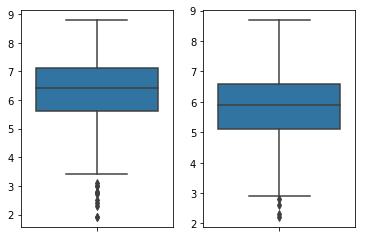

In [18]:
imdb_sci_fi = dataset[dataset['Sci-Fi']==1].imdb_score.values
imdb_Horror = dataset[dataset['Horror']==1].imdb_score.values

print('gemiddelde score sci-fi:',dataset[dataset['Sci-Fi']==1].imdb_score.mean())
print('gemiddelde score horror:',dataset[dataset['Horror']==1].imdb_score.mean())

print('mediaan score sci-fi:',dataset[dataset['Sci-Fi']==1].imdb_score.median())
print('mediaan score horror:',dataset[dataset['Horror']==1].imdb_score.median())

print('standaardafwijking score sci-fi:',dataset[dataset['Sci-Fi']==1].imdb_score.std())
print('standaardafwijking score horror:',dataset[dataset['Horror']==1].imdb_score.std())


# Maken van subplots
f, axes = plt.subplots(1, 2)

sns.boxplot(imdb_sci_fi,whis = 1.5, orient='v',ax=axes[0])

sns.boxplot(imdb_Horror,whis = 1.5, orient='v',ax=axes[1])


Bepaal de uitschieters bij de winst. Welke film brachten een extreem grote winst met zich mee en welke een extreem groot verlies?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking. 

In [19]:
# Uitschieters via kwartielen

Q1 = dataset['profit'].quantile(0.25)
Q3 = dataset['profit'].quantile(0.75)
IKA = Q3-Q1

upper_limit = Q3+1.5*IKA
lower_limit = Q1-1.5*IKA


outliers = dataset[(dataset['profit']<lower_limit) | (dataset['profit']>upper_limit)]

outliers.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,523505847.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,78530303.0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,208991599.0


In [20]:
# Uitschieters via kwartielen

average = dataset['profit'].mean()
stdafwijking = dataset['profit'].std()

upper_limit = average + 3*stdafwijking
lower_limit = average - 3*stdafwijking


outliers = dataset[(dataset['profit']<lower_limit) | (dataset['profit']>upper_limit)]

outliers.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,profit
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.397702e+09
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-2.127110e+09
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-1.221330e+10
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-2.499804e+09
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,10822,Preity Zinta,2.0,264.0,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-6.967246e+08
